# Climate dynamics:
## Predicting the weather: spatial patterns approach
In this part of the climate dynamics tutorial, we will use climate model output to estimate the spatial patterns of climate change.  
First, import everything we need.

In [1]:
!pip install cartopy
!pip install cftime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import glob
from scipy.constants import convert_temperature

In [3]:
!git clone https://github.com/peterukk/IE_CDT_ClimateDynamicsTutorial

Cloning into 'IE_CDT_ClimateDynamicsTutorial'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 67 (delta 25), reused 9 (delta 2), pack-reused 13 (from 1)
Receiving objects: 100% (67/67), 95.31 MiB | 32.73 MiB/s, done.
Resolving deltas: 100% (26/26), done.


Predicting long-term climate change requires using climate model scenarios. We will use two equilibrium climate simulations and interpolate between the two: a 4xCO2 scenario and a pre-industrial scenario. Open the data.

In [4]:
data_path = "IE_CDT_ClimateDynamicsTutorial/data/"
filename_PI = data_path + "tas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_196001-204912.nc"
ds_PI = xr.open_dataset(filename_PI)
ds_PI

<xarray.Dataset> Size: 119MB
Dimensions:    (time: 1080, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 9kB 1960-01-16 00:00:00 ... 2049-12-16 00:00:00
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 17kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 119MB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   39600.0
    branch_time_in_parent:  39600.0
    creation_date:          2019-04-05T15:19:17Z
    ...                     ...
    title:                  UKESM1-0-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/7c0131d5-0189-4856-94a7-a305e139602a

In [5]:
filename_4xCO2 = data_path + "tas_Amon_UKESM1-0-LL_abrupt-4xCO2_r1i1p1f2_gn_195001-199912.nc"
ds_4xCO2 = xr.open_dataset(filename_4xCO2)
ds_4xCO2

<xarray.Dataset> Size: 66MB
Dimensions:    (time: 600, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 5kB 1950-01-16 00:00:00 ... 1999-12-16 00:00:00
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 10kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 66MB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  39600.0
    creation_date:          2019-04-05T15:14:37Z
    ...                     ...
    title:                  UKESM1-0-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/07719010-69f1-4046-b04f-05ddaf0d1ee8

Take the average of time and have a look at the differences between the two simulations.

In [6]:
# Average over time and get just pattern
surface_temp_PI = ds_PI["tas"].mean(dim="time")
surface_temp_4xCO2 = ds_4xCO2["tas"].mean(dim="time")
surface_temp_4xCO2

<xarray.DataArray 'tas' (lat: 144, lon: 192)> Size: 111kB
array([[235.67888, 235.68628, 235.69281, ..., 235.68016, 235.67935,
        235.68208],
       [236.88333, 236.7978 , 236.71388, ..., 237.16812, 237.06956,
        236.97417],
       [237.85487, 237.70416, 237.56068, ..., 238.37529, 238.19182,
        238.0154 ],
       ...,
       [278.41388, 278.43405, 278.45358, ..., 278.3423 , 278.3649 ,
        278.39154],
       [278.09793, 278.10257, 278.1067 , ..., 278.0746 , 278.0848 ,
        278.09244],
       [277.6439 , 277.64462, 277.64532, ..., 277.64075, 277.6418 ,
        277.64273]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


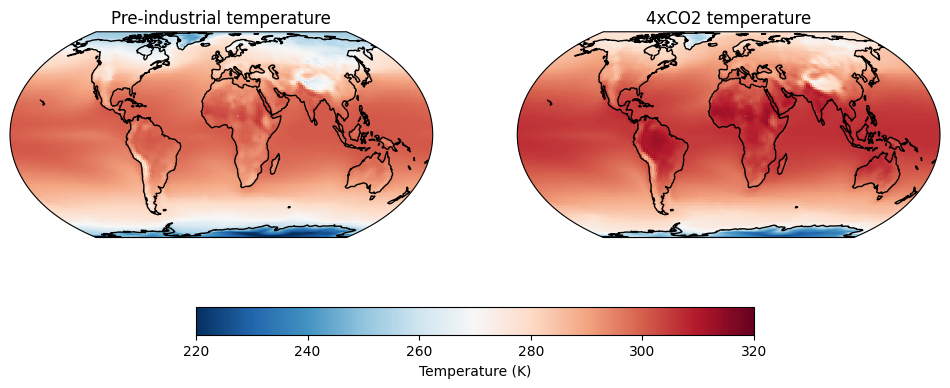

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw={'projection': ccrs.EqualEarth(central_longitude=0)})

axs[0].coastlines()
colormap_PI = axs[0].pcolormesh(surface_temp_PI.lon,
                                surface_temp_PI.lat,
                                surface_temp_PI,
                                vmin=220, vmax=320,
                                cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[0].set_title("Pre-industrial temperature")

axs[1].coastlines()
plt.sca(axs[1])
colormap_4xCO2 = axs[1].pcolormesh(surface_temp_4xCO2.lon,
                                   surface_temp_4xCO2.lat,
                                   surface_temp_4xCO2,
                                   vmin=220, vmax=320,
                                   cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[1].set_title("4xCO2 temperature")

plt.colorbar(colormap_PI, ax=axs,
             location="bottom",
             orientation="horizontal",
             shrink=0.6,
             label="Temperature (K)")


## Pattern scaling
A simple approach to interpolate between these two climates at the year 2100 is called "Pattern Scaling" (Santer, 1990, Mitchell, 2003). This has been used for many years and still holds up fairly well. It assumes that the global warming pattern remains constant and is scaled by a scaler variable, such as global mean temperature. Then, we can estimate the global warming changes as
$$P(x,y) =  \frac{\Delta T}{\Delta T_{ref}} P_{ref}(x,y) $$
where $P_{ref}(x,y)$ is a reference global warming pattern, $\Delta T_{ref}$ is the global mean temperature change in the reference scenario and $\Delta T$ is the global mean temperature change in the new scenario. Note that we have to estimate the latter from somewhere, such as the IPCC report, an energy balance model, a climate model emulator. We will assume that in 2100 the global mean temperature change relative to pre-industrial is ~3K [IPCC, 2021].
1. Take temperature difference between two scenarios to get $P_{ref}$
2. Normalise pattern by global mean temperature change - this gives the pattern of warming per 1K of warming $ \frac{P_{ref}(x,y)}{\Delta T_{ref}} $. The normalized pattern should be centered around 1. Hint: Don't forget to take an area weighted mean to account for different grid cell sizes, otherwise there will be larger contributions from higher latitudes. [This is quite easy to do with xarray](https://docs.xarray.dev/en/latest/examples/area_weighted_temperature.html)


In [8]:
surface_temp_pref = surface_temp_PI - surface_temp_4xCO2
surface_temp_pref

# surface_temp_pattern.weighted(weights).mean().values # should be equal to 1


Plot the normalised warming pattern. Which regions are projected to experience larger relative warming?

3. Scale the pattern by the new global mean temperature change. Add the scaled temperature changes (which assumed ~3K global warming) to the preindustrial temperatures. What's the projected temperature for Oxford in 2100?

## Compare pattern of projected changes to observed changes so far
How does the pattern of surface temperature changes predicted by the UKESM1 climate model compare to observed changes between 1950 and 2025?

You can compare the projected warming pattern to trend in ERA5 reanalysis data, which was already downloaded: ERA5_t2m_monthly_1950-2025_global_lfs.nc. The file is more than 1GB due to ERA5 having much higher spatial resolution than the climate model. Use the first and last 30 year periods to compute a baseline and present-day observed climate. The time scales are different to the climate model projections, but again we can look at normalised patterns to compare the two.

In [ ]:
filename_ERA5 = data_path + "ERA5_t2m_monthly_1950-2025_global_lfs.nc"
ds_ERA5 = xr.open_dataset(filename_ERA5)
ds_ERA5


In [ ]:
surface_temp_ERA5 = ds_ERA5["t2m"]
# Extract the first and last 30 years as separate DataArrays, and take the temporal mean of both
surface_temp_ERA5_1 = surface_temp_ERA5.sel(valid_time=slice("1950-01-01", "1980-01-01")).mean(dim="valid_time")
surface_temp_ERA5_2 = surface_temp_ERA5.sel(valid_time=slice("1995-10-01", "2025-10-01")).mean(dim="valid_time")
surface_temp_ERA5_2

In [ ]:
# Plot the first and last 30 years surface temperature in ERA5. This will take about a minute as the data has a relatively high resolution!
fig, axs = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw={'projection': ccrs.EqualEarth(central_longitude=0)})

axs[0].coastlines()
colormap_beg = axs[0].pcolormesh(surface_temp_ERA5_1.longitude,
                                surface_temp_ERA5_1.latitude,
                                surface_temp_ERA5_1,
                                vmin=220, vmax=320,
                                cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[0].set_title("ERA5 temperature, 1950-1980")

axs[1].coastlines()
plt.sca(axs[1])
colormap_end = axs[1].pcolormesh(surface_temp_ERA5_2.longitude,
                                   surface_temp_ERA5_2.latitude,
                                   surface_temp_ERA5_2,
                                   vmin=220, vmax=320,
                                   cmap="RdBu_r", transform=ccrs.PlateCarree())
axs[1].set_title("ERA5 temperature, 1995-2025")

plt.colorbar(colormap_beg, ax=axs,
             location="bottom",
             orientation="horizontal",
             shrink=0.6,
             label="Temperature (K)")

In [ ]:
# Compute and plot the normalised warming pattern in ERA5

In [ ]:
# Compare with the one based on climate model data. How do the warming patterns differ?

## References
* Santer, B. D., Wigley, T. M., Schlesinger, M. E., & Mitchell, J. F. (1990). Developing climate scenarios from equilibrium GCM results.
* Mitchell, T. D. (2003). Pattern scaling: an examination of the accuracy of the technique for describing future climates. Climatic change, 60(3), 217-242.
* Tebaldi, C., & Arblaster, J. M. (2014). Pattern scaling: Its strengths and limitations, and an update on the latest model simulations. Climatic Change, 122, 459-471.
* IPCC, 2021: Summary for Policymakers. In: Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Masson-Delmotte, V., P. Zhai, A. Pirani, S.L. Connors, C. Péan, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M.I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J.B.R. Matthews, T.K. Maycock, T. Waterfield, O. Yelekçi, R. Yu, and B. Zhou (eds.)]. In Press.